## Модели регрессии для недвижимости Калифорнии

Этот датасет содержит информацию о ценах на жилье в Калифорнии, США, собранную в ходе переписи населения США 1990 года.

Общая статистика датасета:

- Общее количество записей: 20,640 наблюдений

- Количество признаков: 8 социально-экономических и географических характеристик

- Средняя стоимость домов: 206,856 долларов США

- Диапазон цен: от 14,999 до 500,001 долларов США

Данные содержат следующие столбцы:

Целевая переменная:

- MedHouseVal - Медианная стоимость домов в районе (в долларах США)

Признаки (факторы, влияющие на стоимость):

- MedInc - Медианный доход в районе (тысячи долларов)

- HouseAge - Медианный возраст домов в районе (годы)

- AveRooms - Среднее количество комнат в домах района

- AveBedrms - Среднее количество спален в домах района

- Population - Население района

- AveOccup - Среднее количество жильцов в домах

- Latitude - Географическая широта района

- Longitude - Географическая долгота района

### Импорт библиотек

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

### Загрузка данных

In [59]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['medv'] = california.target * 100000

In [60]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medv
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,452600.0000
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,358500.0000
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,352100.0000
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,341300.0000
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,342200.0000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   medv        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [62]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medv
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,206855.8169
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,115395.6159
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,14999.0000
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,119600.0000
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,179700.0000
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,264725.0000
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,500001.0000


In [63]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medv
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,206855.8169
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,115395.6159
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,14999.0000
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,119600.0000
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,179700.0000
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,264725.0000
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,500001.0000


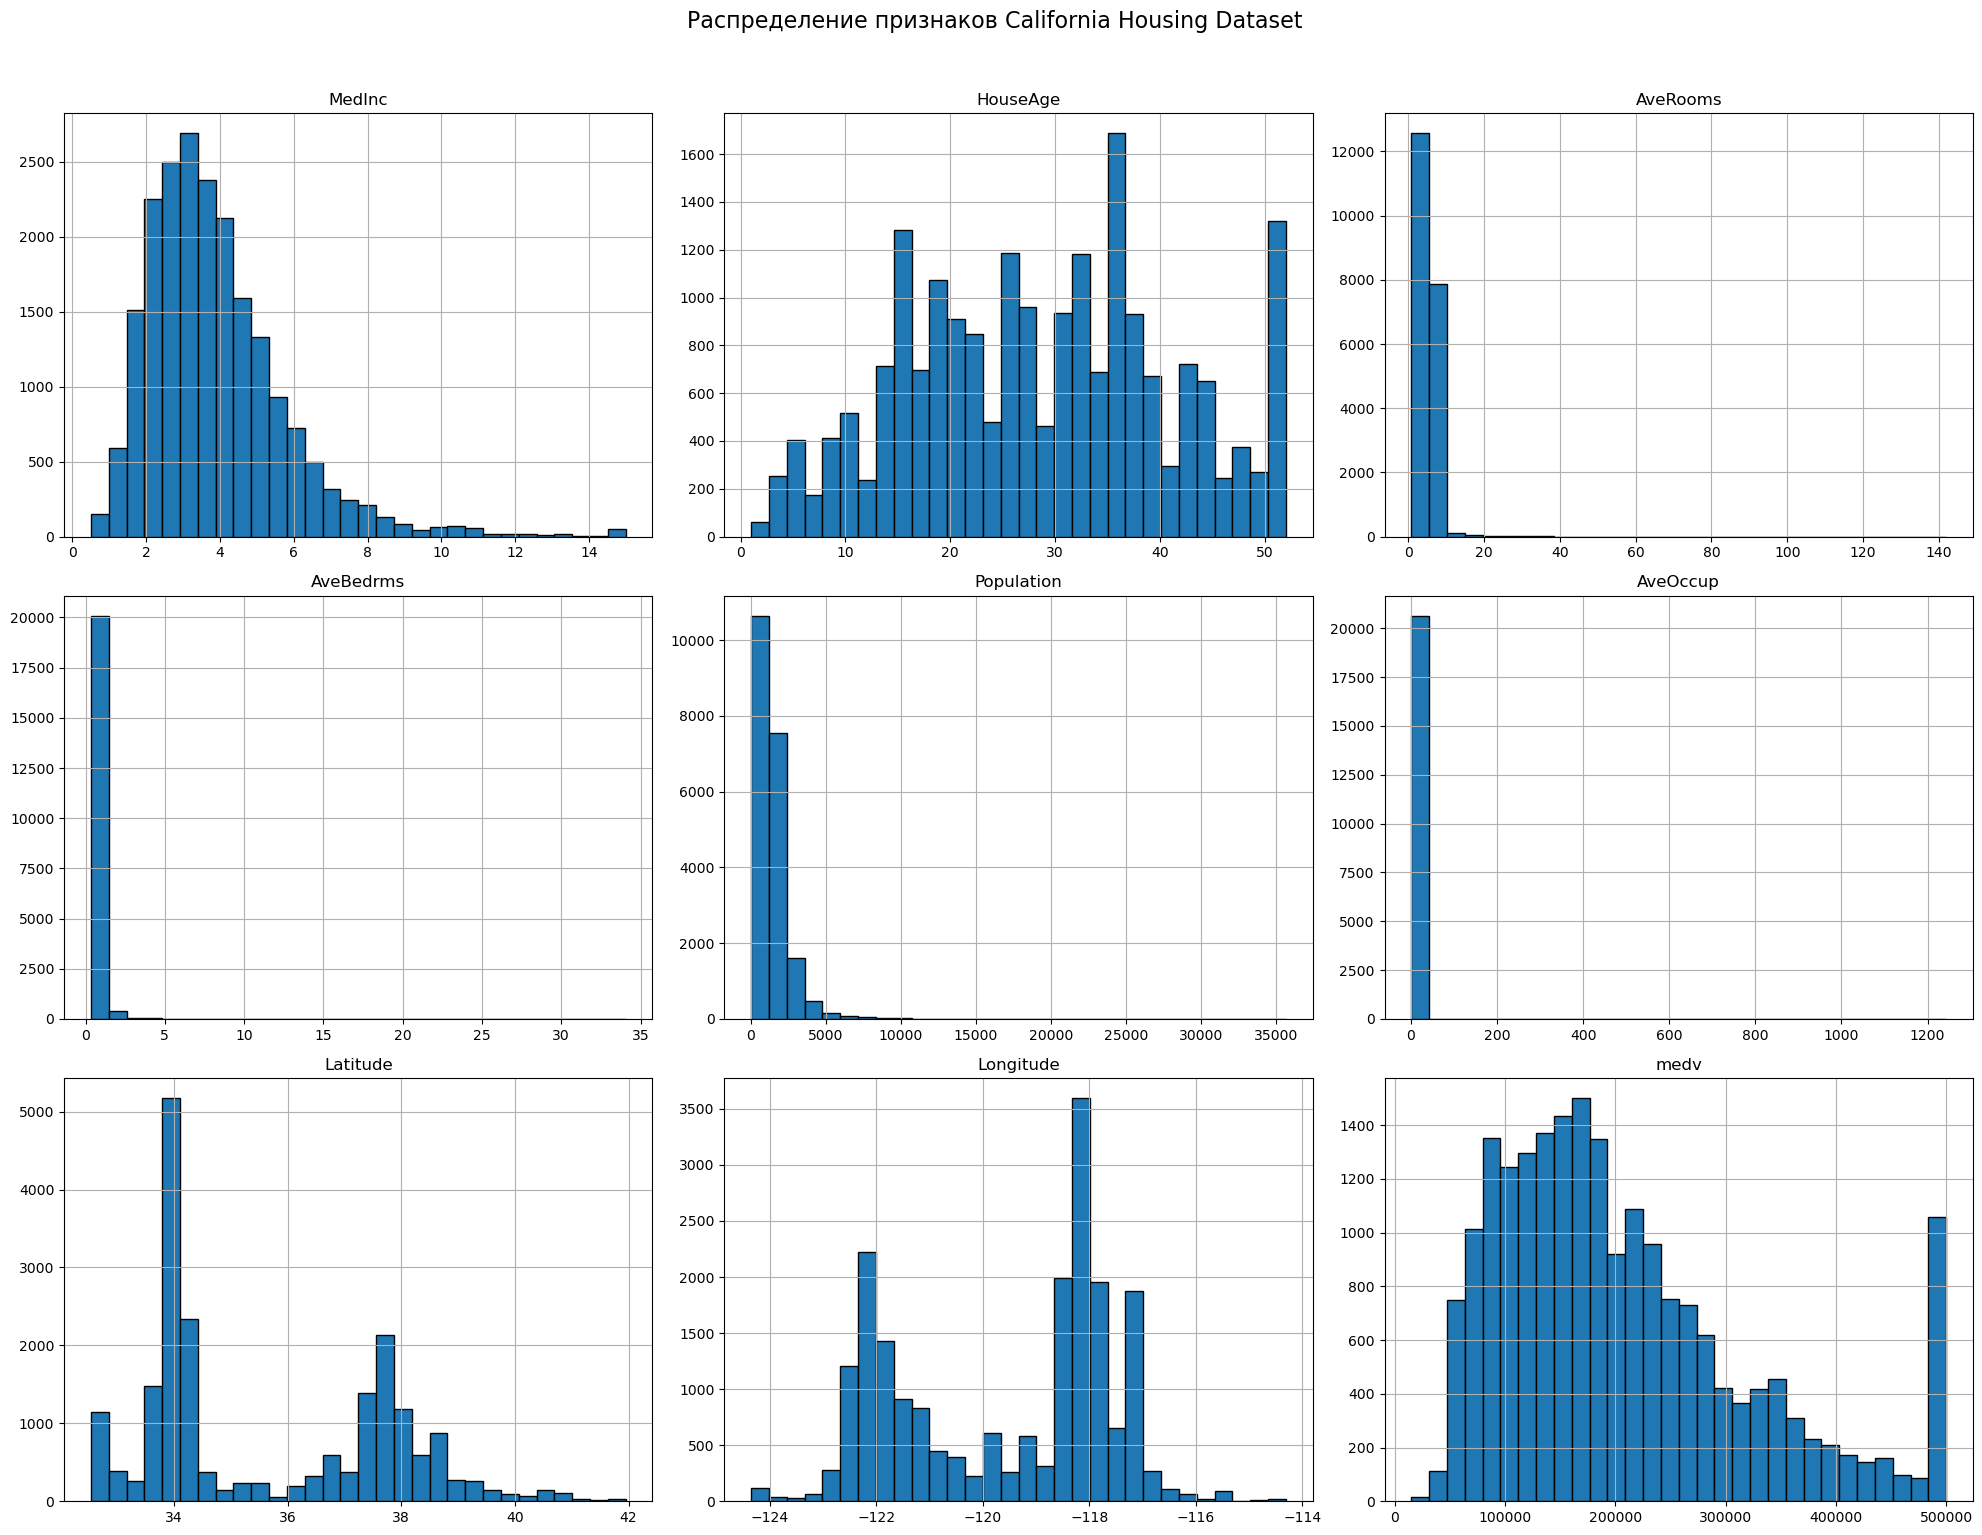

In [64]:
df.hist(figsize=(20,15), bins=30, edgecolor='black')
plt.suptitle('Распределение признаков California Housing Dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

- MedInc (доход): Большинство районов имеют средний доход, есть немного районов с очень высокими доходами

- HouseAge (возраст домов): Нормальное распределение с пиком около 20-30 лет

- AveRooms (комнаты): Большинство домов имеют 3-5 комнат, но есть выбросы с 40+ комнатами

- Latitude/Longitude (координаты): Показывают географическое распределение, данные охватывают всю Калифорнию

- medv (стоимость): Скошенное распределение с диапазоном от 15000 до 500000

<Figure size 1000x800 with 0 Axes>

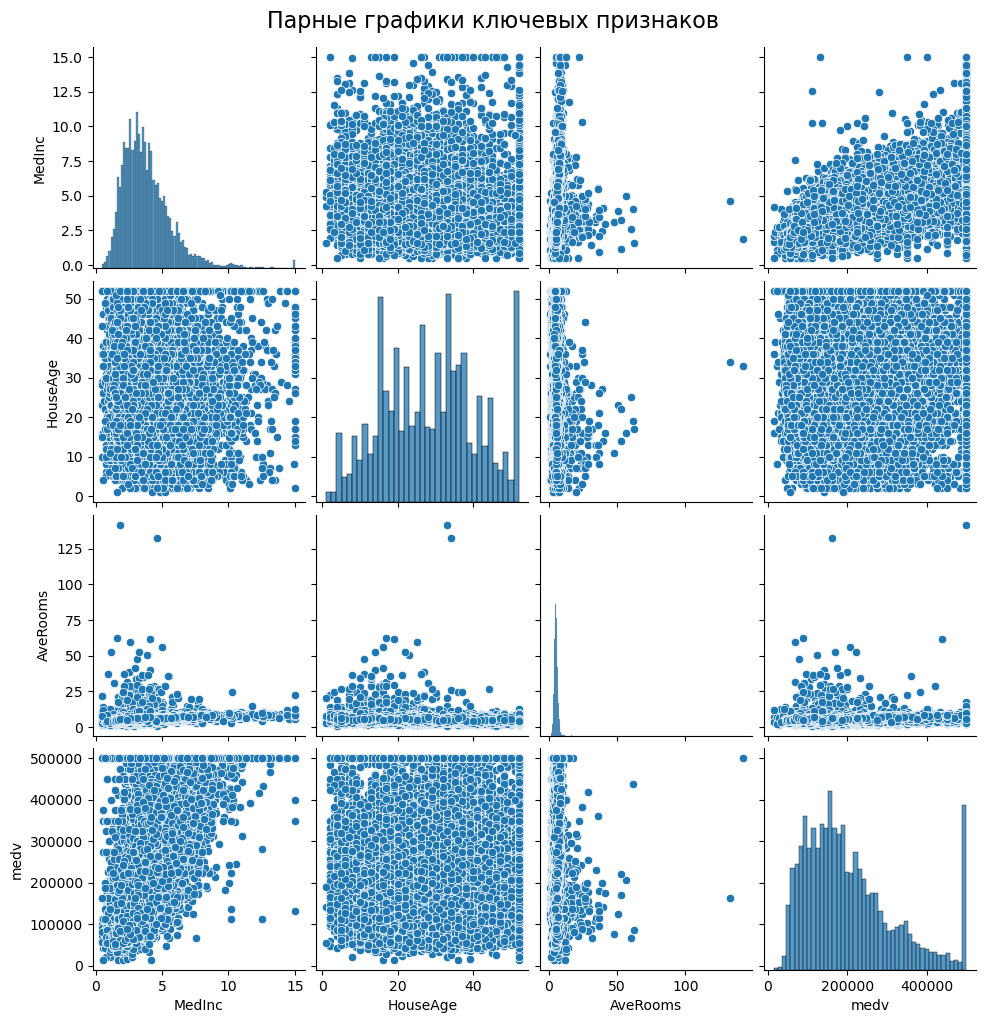

In [65]:
plt.figure(figsize=(10,8))
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'medv']])
plt.suptitle('Парные графики ключевых признаков', y=1.02, fontsize=16)
plt.show()

Наиболее заметна сильная положительная корреляция между доходом (MedInc) и стоимостью жилья (medv)

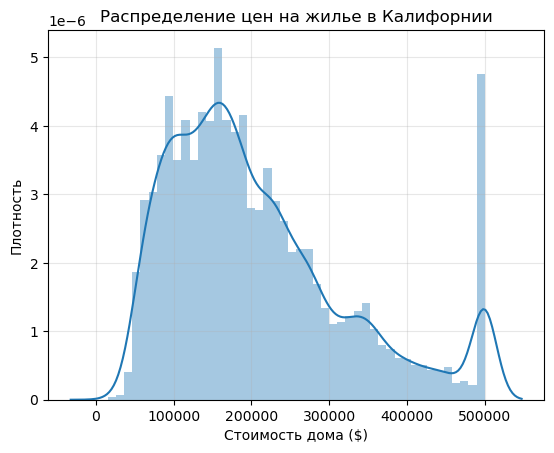

In [66]:
sns.distplot(df['medv'])
plt.title('Распределение цен на жилье в Калифорнии')
plt.xlabel('Стоимость дома ($)')
plt.ylabel('Плотность')
plt.grid(alpha=0.3)
plt.show()

Большинство домов стоят в диапазоне 100 000 - 200 000 $, с длинным правым столбом, небольшое количество очень дорогих домов

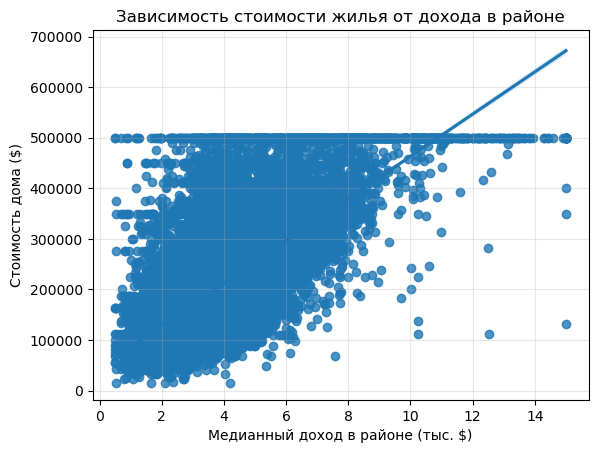

In [67]:
sns.regplot(y='medv', x='MedInc', data=df)
plt.title('Зависимость стоимости жилья от дохода в районе')
plt.xlabel('Медианный доход в районе (тыс. $)')
plt.ylabel('Стоимость дома ($)')
plt.grid(alpha=0.3)
plt.show()

Коэффициент 0.69 указывает, что доход - самый важный фактор, влияющий на стоимость жилья. Чем выше медианный доход в районе, тем дороже там жилье

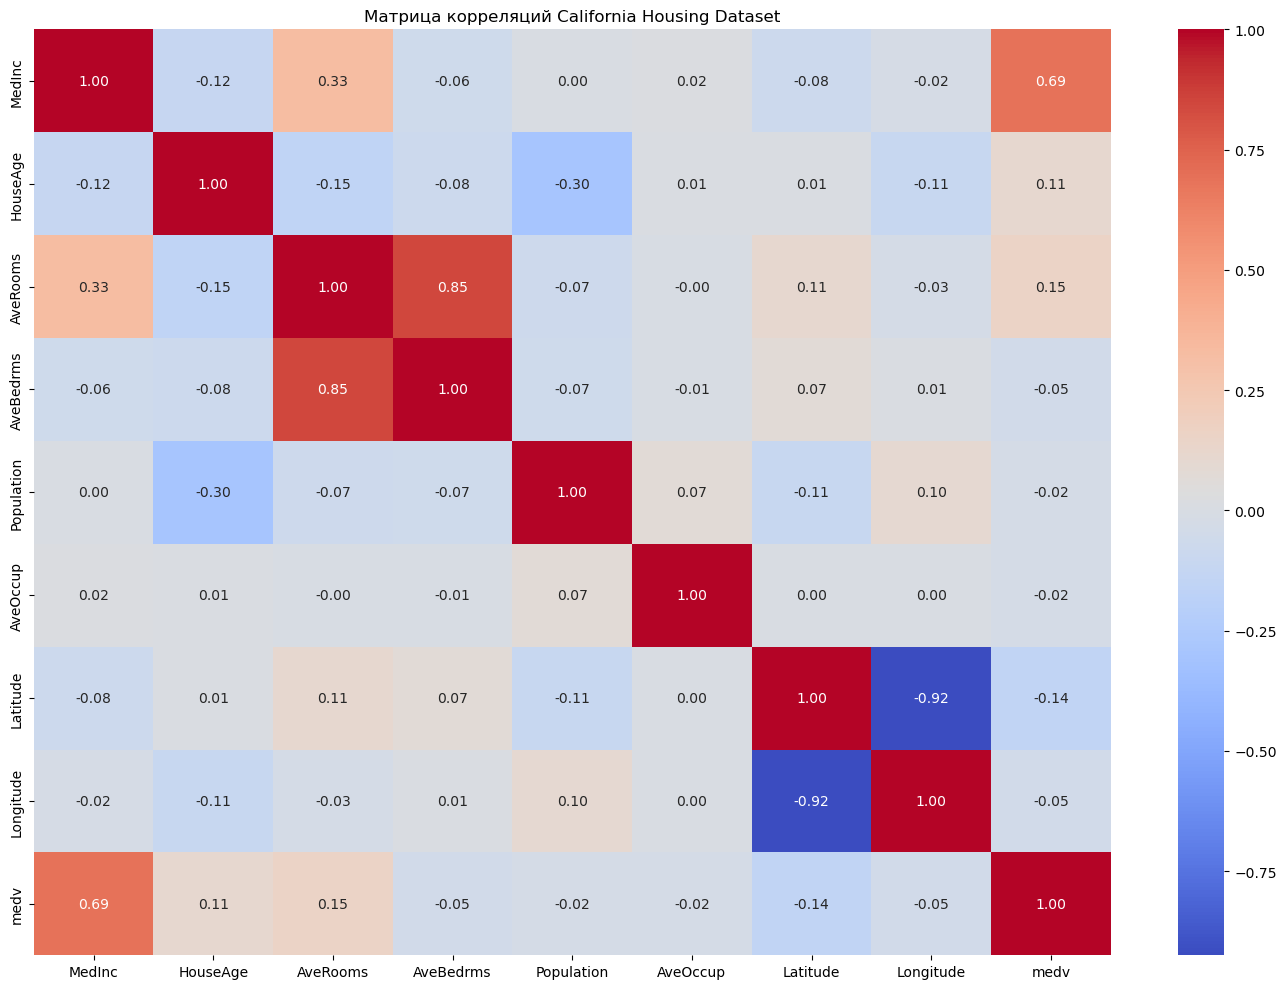

In [68]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций California Housing Dataset')
plt.tight_layout()
plt.show()

### Сильные корреляции:

- __MedInc__ (*Медианный доход в районе*) и __medv__ (*Стоимость жилья*) - доход сильно влияет на цену → __(0.69)__

- __Latitude__ (*Широта*) и __Longtitude__ (*Долгота*) - географические координаты сильно связаны → __(-0.92)__

- __AveRooms__ (*Среднее кол-во комнат в домах района*) и __AveBedrms__ (*Среднее кол-во спален в домах района*) - больше комнат, больше спален → __(0.85)__

### Слабая корреляция:

- __AveOccup__ (*Заполняемость*) почти не коррелирует с другими признаками

- __Population__ (*Население*) слабо коррелирует с другими признаками

### Отрицательные корреляция:

- __Latitude__ (*Широта*) и __medv__ (*Стоимость жилья*) - северные районы дешевле? → __(-0.14)__

- __Population__ (*Население*) и __HouseAge__ (*Возраст домов*) - в более населенных районах дома моложе → __(-0.30)__

In [69]:
# Создание новых признаков для анализа
df['Income Group'] = pd.cut(df['MedInc'], bins=5, labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий'])

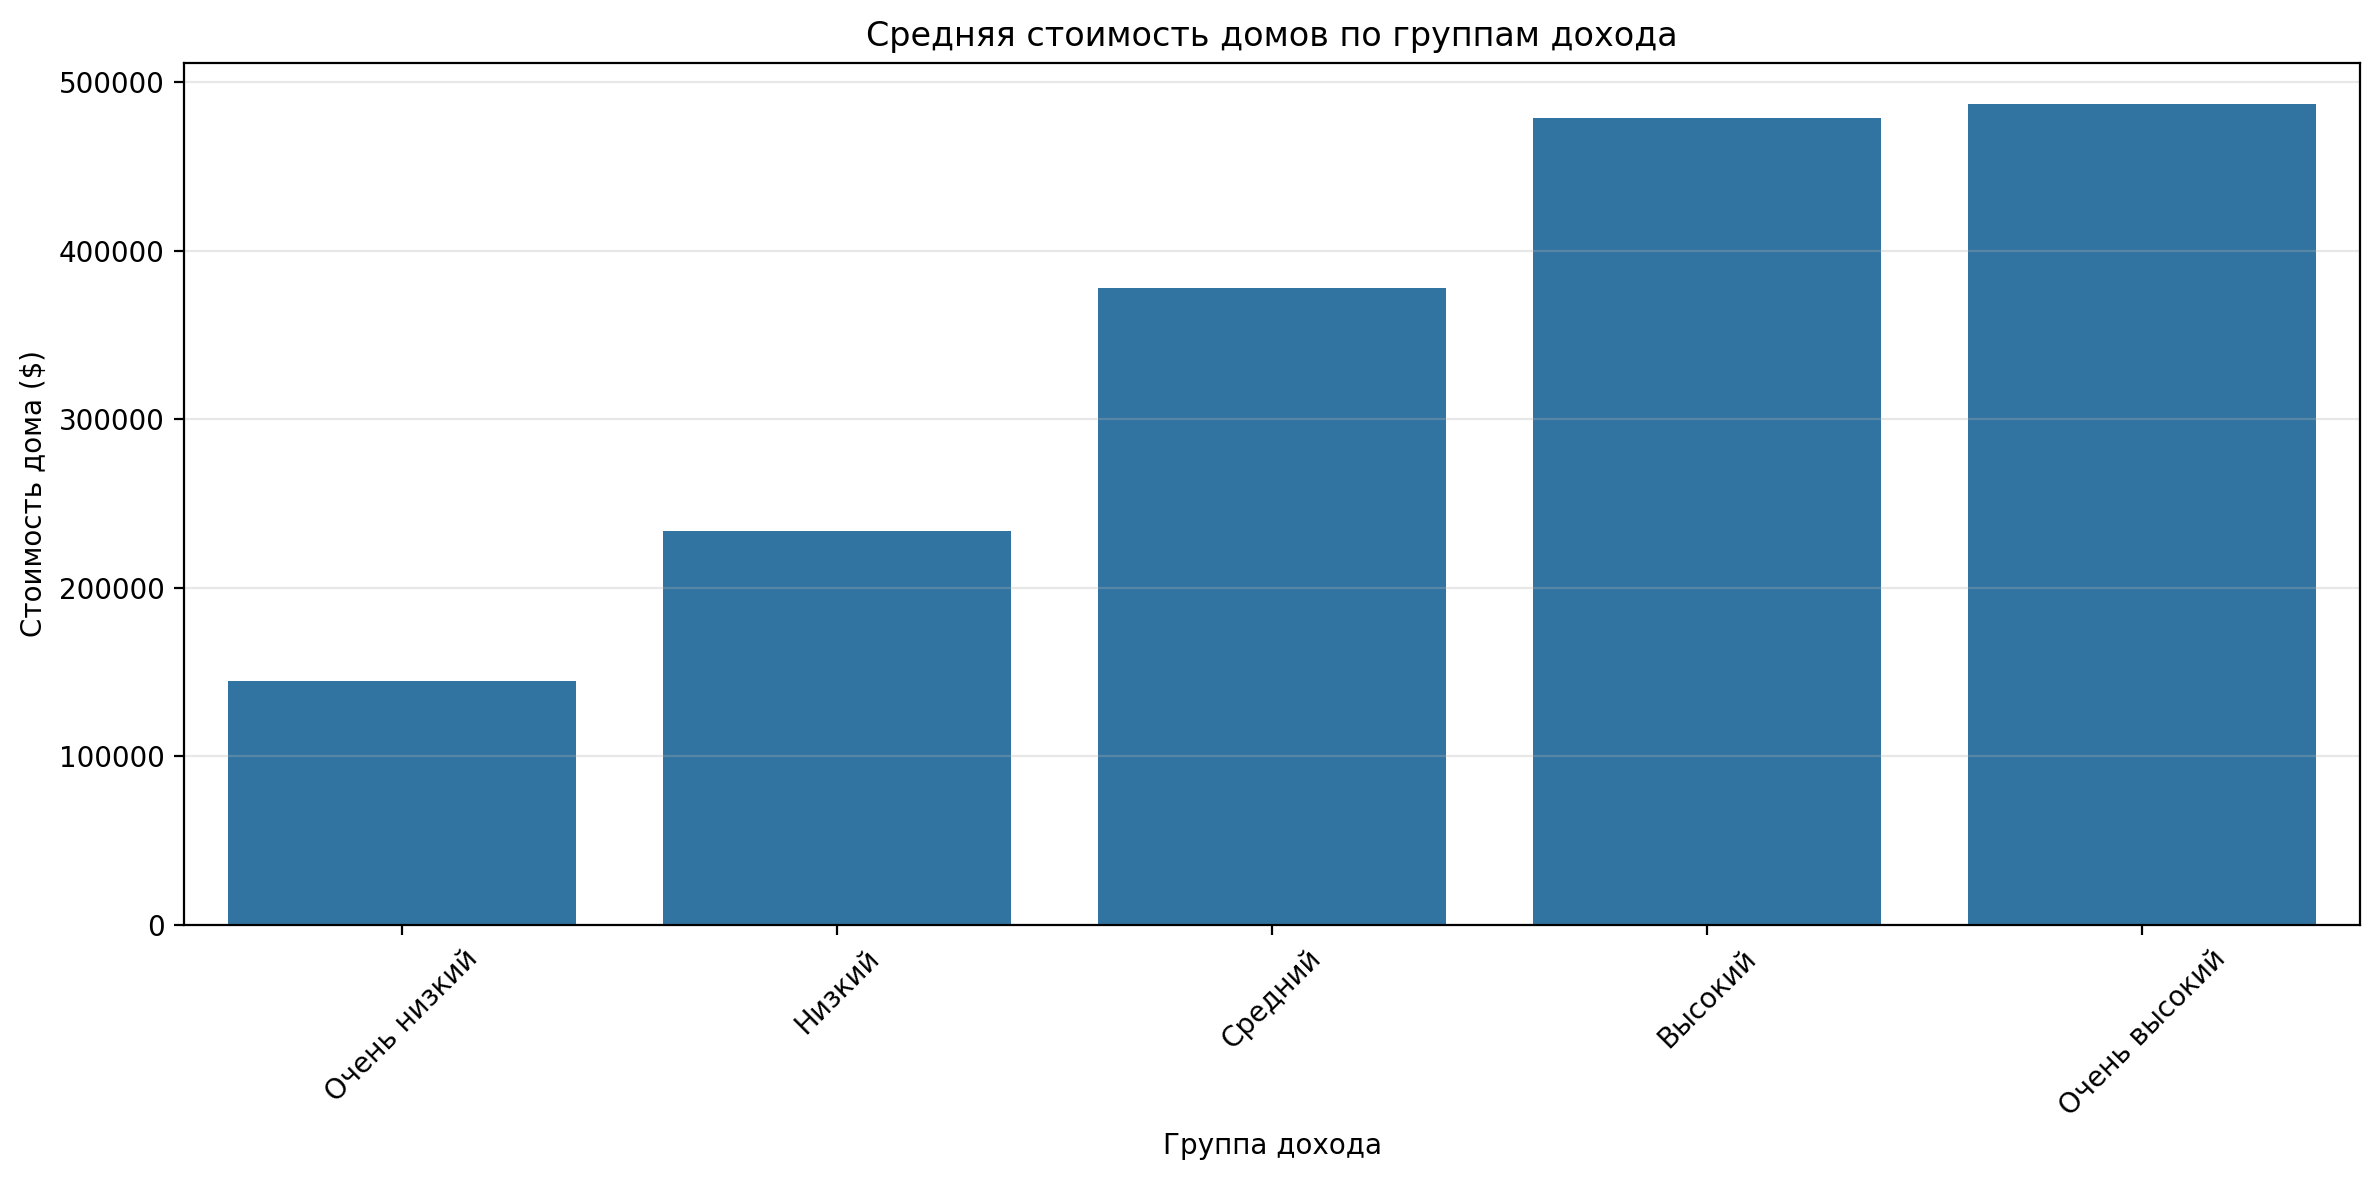

In [70]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='Income Group', y='medv', data=df, ci=None)
plt.title('Средняя стоимость домов по группам дохода')
plt.xlabel('Группа дохода')
plt.ylabel('Стоимость дома ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Чем выше группа дохода, тем дороже средняя стоимость жилья. В районах с "очень высоким" доходом средняя цена почти в 2 раза выше, чем с "очень низким" доходом

In [71]:
df['Age Group'] = df['HouseAge'].apply(lambda x: int(x/10)*10)

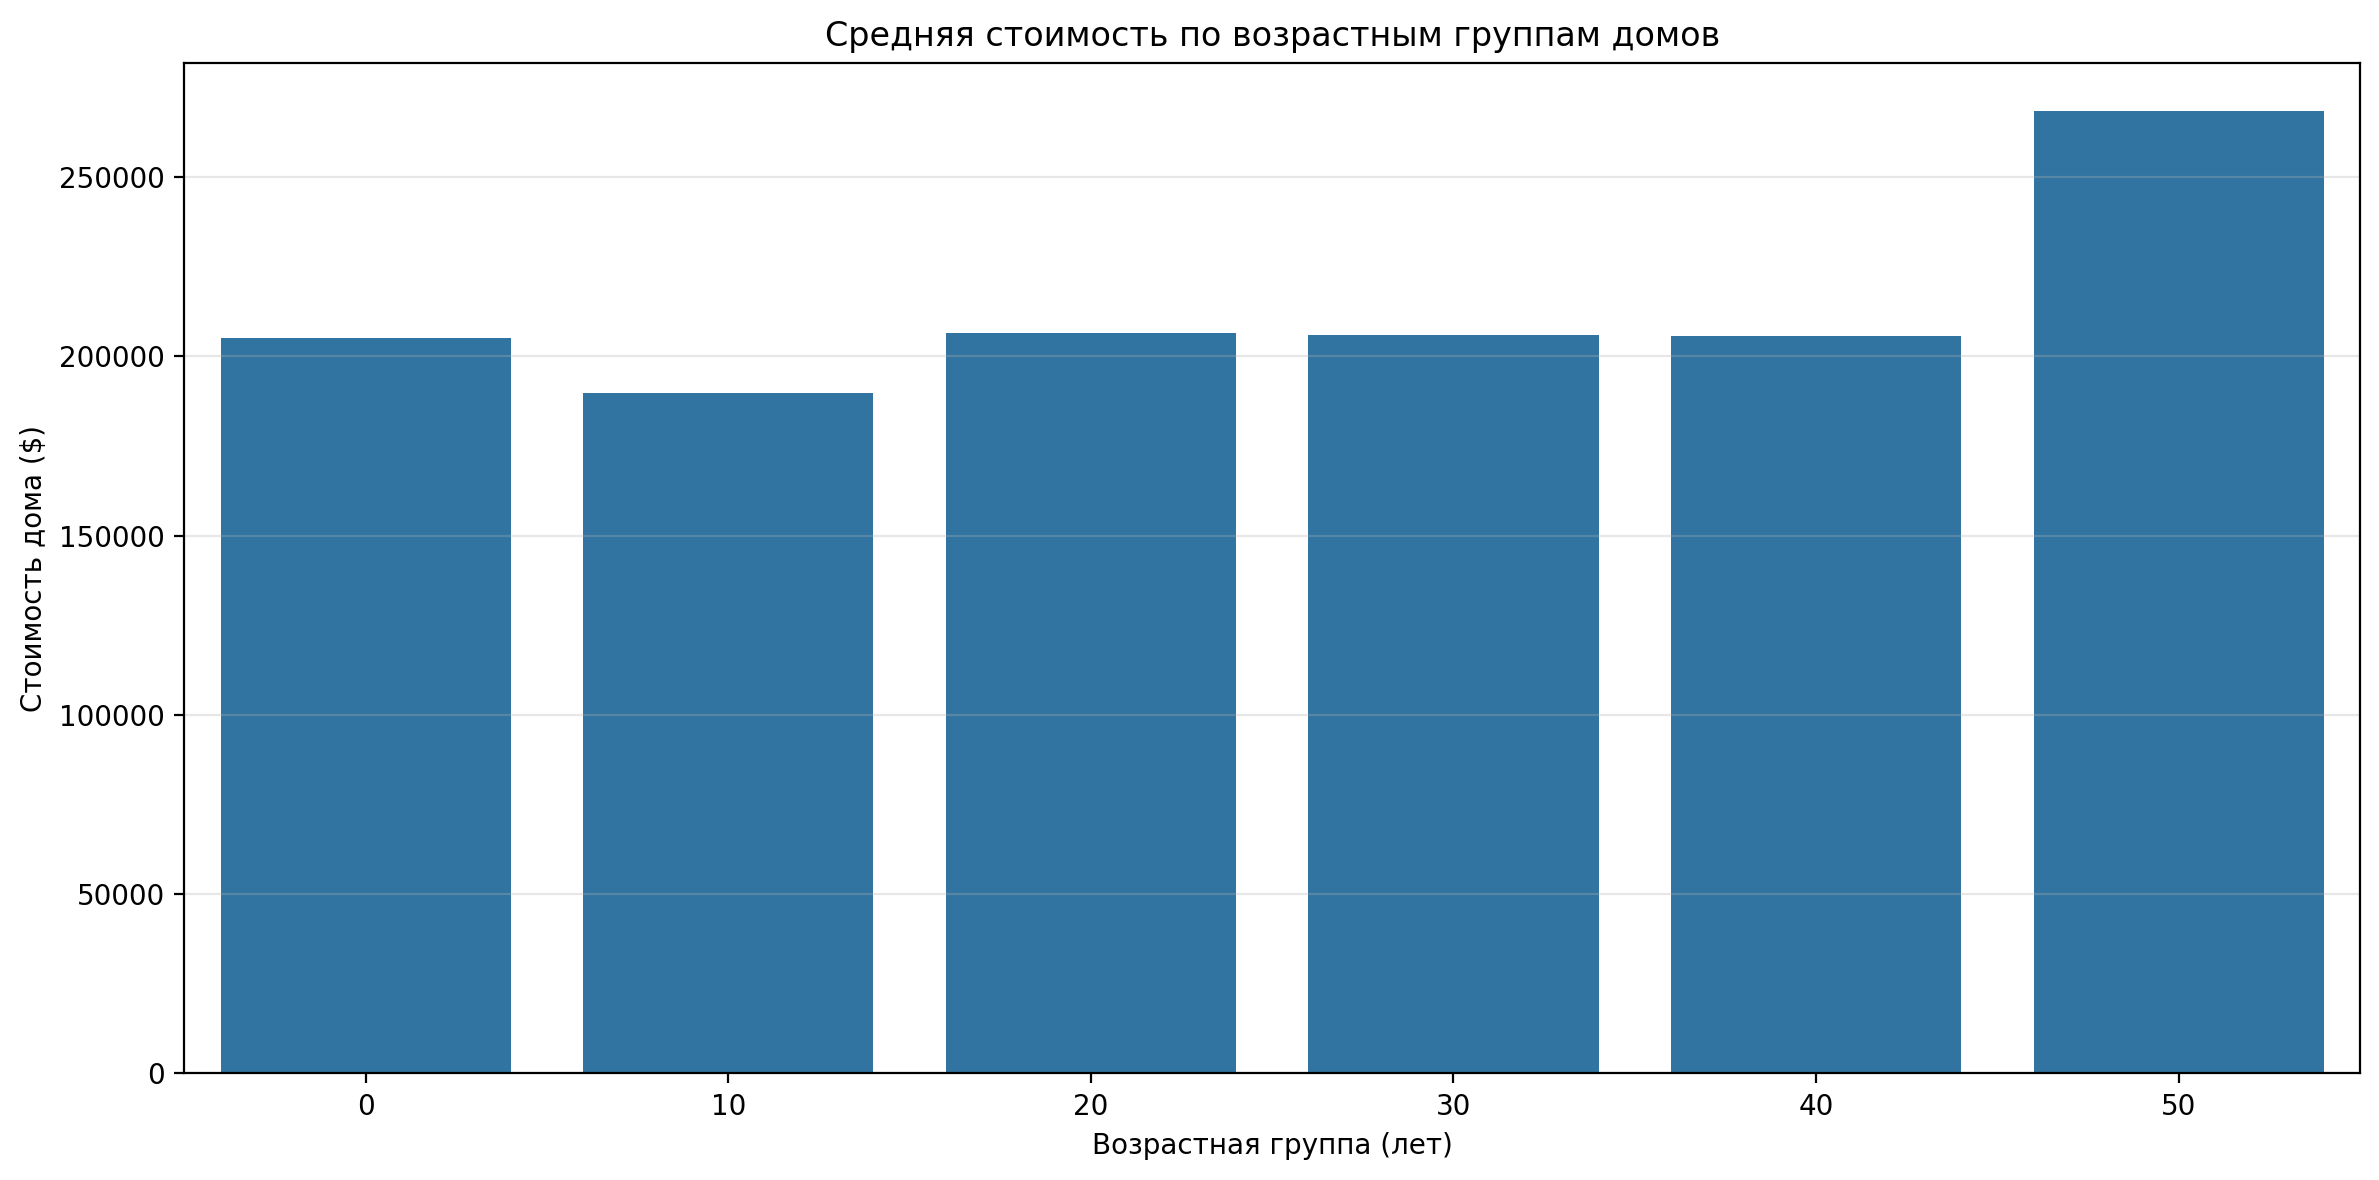

In [72]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='Age Group', y='medv', data=df, ci=None)
plt.title('Средняя стоимость по возрастным группам домов')
plt.xlabel('Возрастная группа (лет)')
plt.ylabel('Стоимость дома ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Самые дорогие дома это самые новые (0-10 лет) и самые старые (50+ лет). Средняя стоимость минимальная для домов возрастом 30-40 лет

In [73]:
df['Room Group'] = df['AveRooms'].apply(lambda x: int(x))

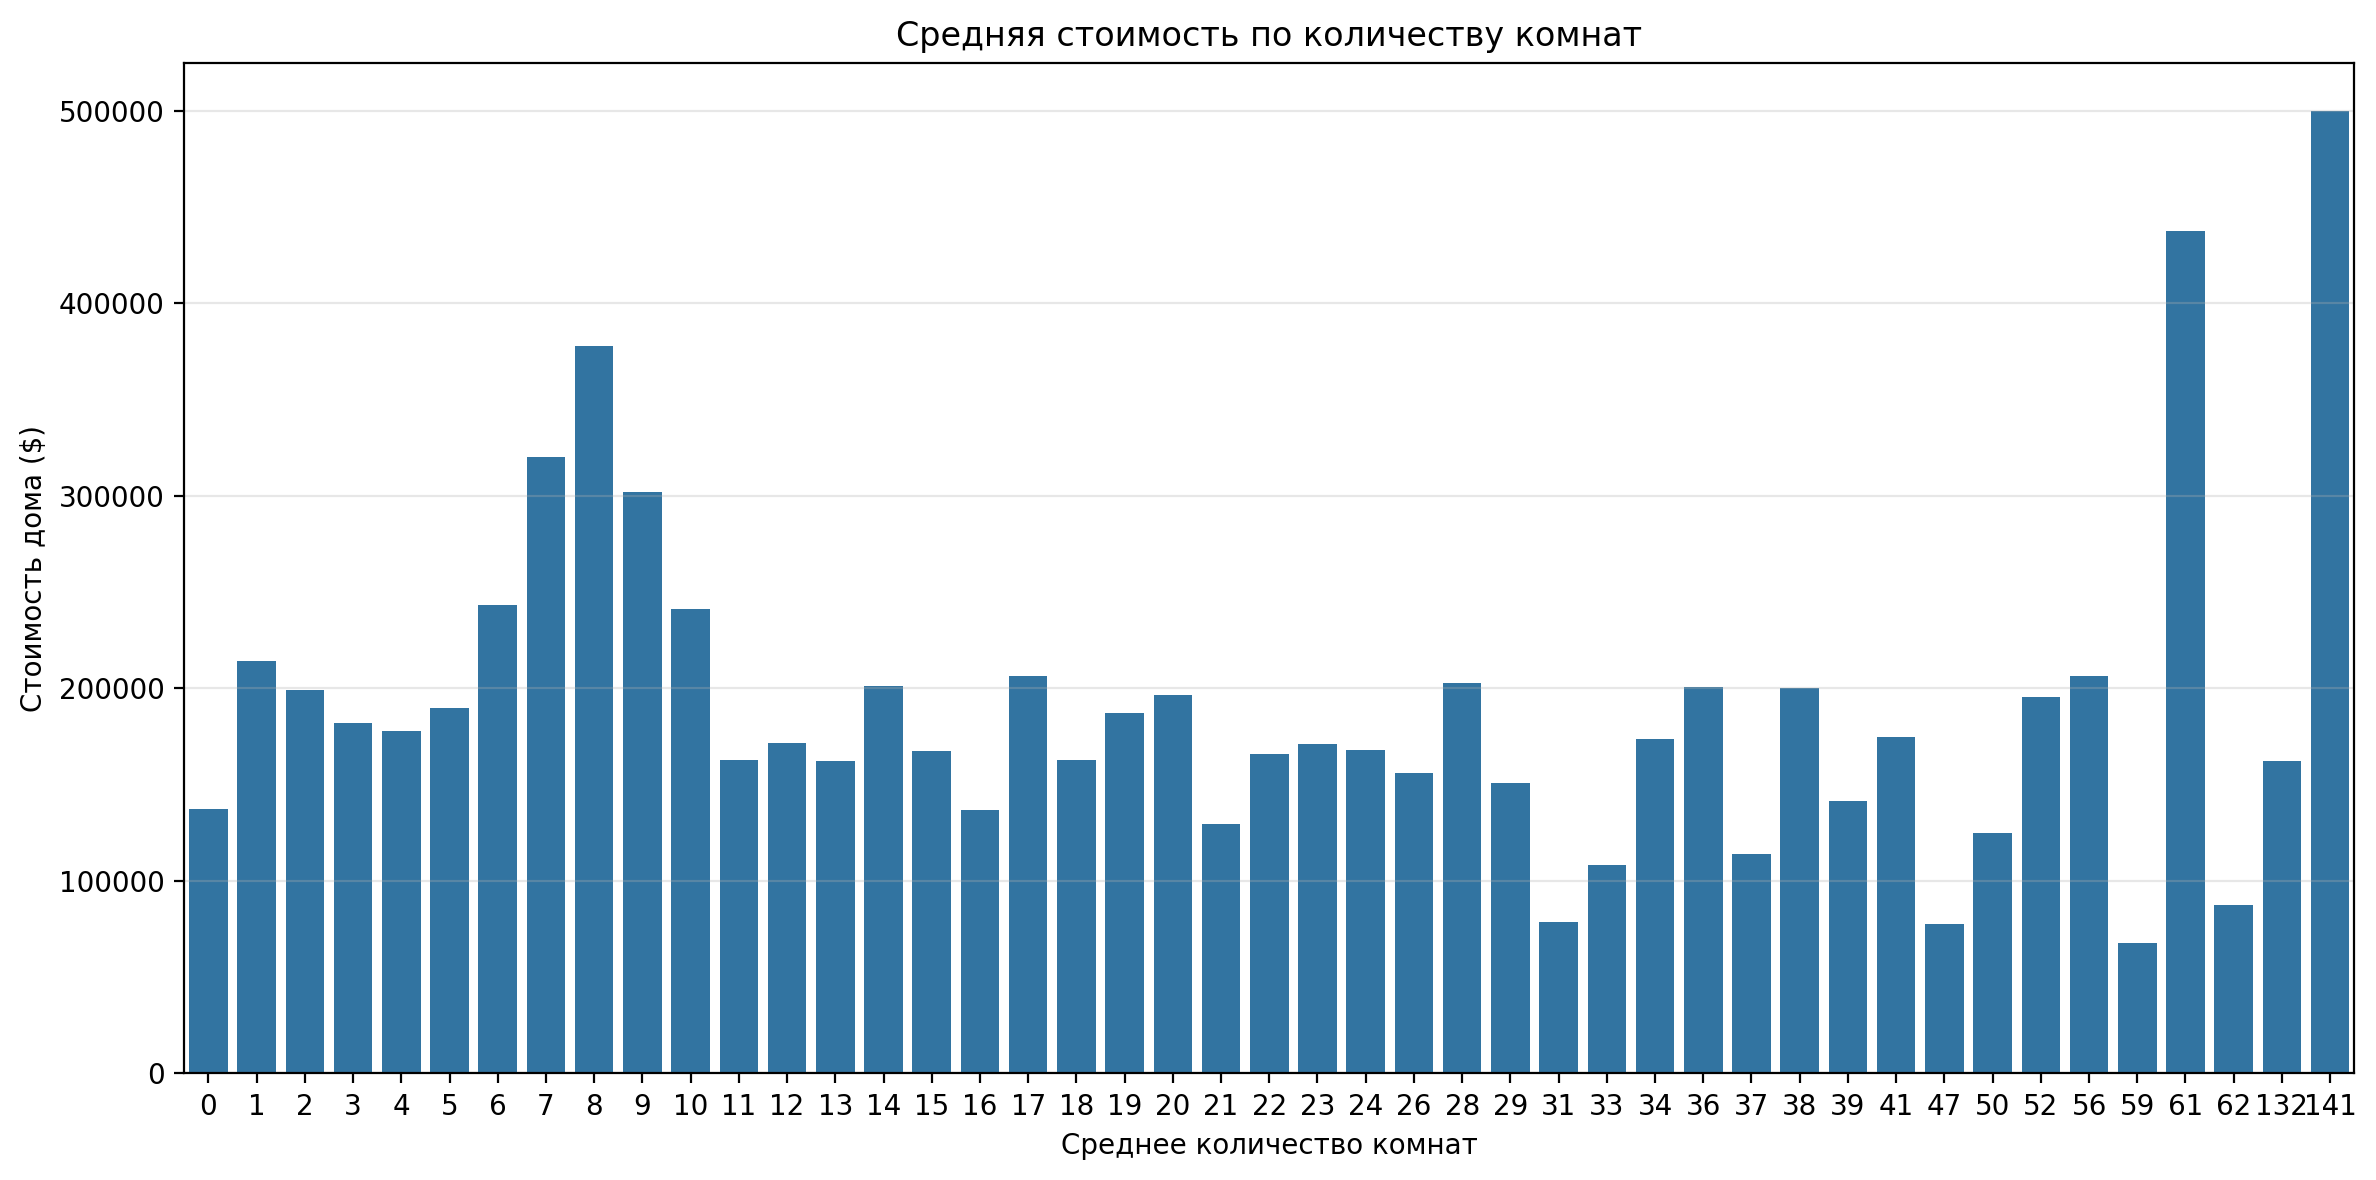

In [74]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='Room Group', y='medv', data=df, ci=None)
plt.title('Средняя стоимость по количеству комнат')
plt.xlabel('Среднее количество комнат')
plt.ylabel('Стоимость дома ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Чем больше среднее кол-во комнат в районе, тем выше стоимость жилья. Заметен скачок для домов с 6+ комнатами. После 8 наблюдается снижение, возможно из-за выбросов

In [75]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'medv', 'Income Group', 'Age Group',
       'Room Group'],
      dtype='object')

In [76]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['medv']

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [80]:
lrm.intercept_

-3705624.13315252

In [81]:
lrm.coef_

array([ 4.45822565e+04,  9.68186799e+02, -1.22095112e+04,  7.78599557e+04,
       -7.75740400e-02, -3.37002667e+02, -4.18536747e+04, -4.33687976e+04])

In [82]:
predictions = lrm.predict(X_test)
predictions[:10]

array([ 72604.90726242, 176743.38262402, 271092.16111176, 283514.72702054,
       260695.80654515, 201073.856116  , 264067.3864538 , 216706.16083506,
       274012.05573145, 390361.52555131])

In [83]:
y_test[:10].round(3)

20046    47700.0000
3024     45800.0000
15663   500001.0000
20484   218600.0000
9814    278000.0000
13311   158700.0000
7113    198200.0000
7668    157500.0000
18246   340000.0000
5723    446600.0000
Name: medv, dtype: float64

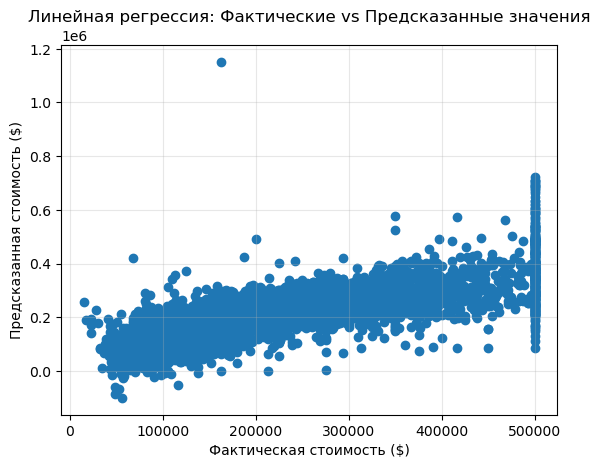

In [84]:
plt.scatter(y_test, predictions)
plt.title('Линейная регрессия: Фактические vs Предсказанные значения')
plt.xlabel('Фактическая стоимость ($)')
plt.ylabel('Предсказанная стоимость ($)')
plt.grid(alpha=0.3)
plt.show()

Есть значительный разброс, особенно для дорогих домов. Недостаточно хорошо модель справляется с прогнозированием крайних значений

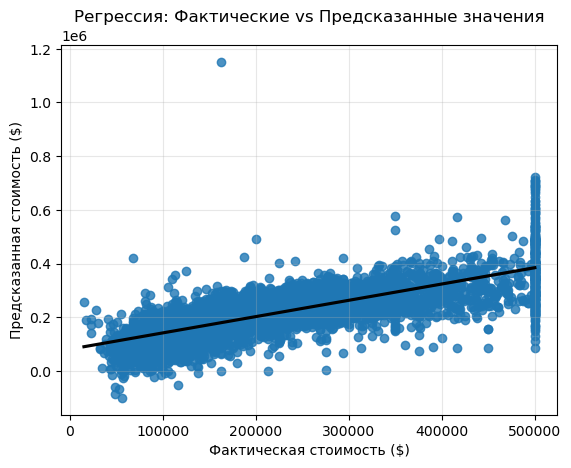

In [85]:
sns.regplot(x=y_test, y=predictions, line_kws={"color":"black"})
plt.title('Регрессия: Фактические vs Предсказанные значения')
plt.xlabel('Фактическая стоимость ($)')
plt.ylabel('Предсказанная стоимость ($)')
plt.grid(alpha=0.3)
plt.show()

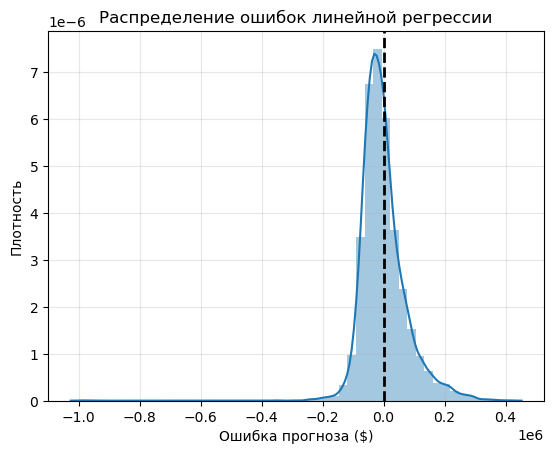

In [86]:
sns.distplot((y_test - predictions))
plt.title('Распределение ошибок линейной регрессии')
plt.xlabel('Ошибка прогноза ($)')
plt.ylabel('Плотность')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.grid(alpha=0.3)
plt.show()

Линия центрирована около 0, что хорошо. Однако модель систематически недооценивает стоимость некоторых домов

In [87]:
from sklearn import metrics

In [88]:
print(f"MAE: {metrics.mean_absolute_error(y_test, predictions)}")
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")
print(f"R²: {metrics.r2_score(y_test, predictions)}")

MAE: 52724.74538305954
MSE: 5305677824.76675
RMSE: 72840.08391515451
R²: 0.5957702326061665


### Вывод по линейной регрессии

#### Модель подходит для быстрого анализа, но недостаточна для точных прогнозов, ошибка прогноза составляет десятки тысяч долларов

------------------------------------------------------

### Классическая модель (XGBoost)

In [89]:
from xgboost import XGBRegressor

In [90]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

In [91]:
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [92]:
print("\nXGBoost результаты:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions)}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions))}")
print(f"R²: {r2_score(y_test, xgb_predictions)}")


XGBoost результаты:
MAE: 31609.219221879037
MSE: 2242375685.905669
RMSE: 47353.72937695266
R²: 0.8291575493536332


### Выводы по XGBoost

#### Наилучшая точность среди всех моделей, ошибка прогноза значительно снижена

____

### Нейронная модель

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [97]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

In [98]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [99]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
181/181 [==============================] - 2s 4ms/step - loss: 54711750656.0000 - mae: 203740.1250 - mse: 54711750656.0000 - val_loss: 51845160960.0000 - val_mae: 196639.5312 - val_mse: 51845160960.0000
Epoch 2/200
181/181 [==============================] - 1s 3ms/step - loss: 21542297600.0000 - mae: 109116.9844 - mse: 21542297600.0000 - val_loss: 10499106816.0000 - val_mae: 71362.7812 - val_mse: 10499106816.0000
Epoch 3/200
181/181 [==============================] - 1s 3ms/step - loss: 5016494592.0000 - mae: 52614.1016 - mse: 5016494592.0000 - val_loss: 5649574400.0000 - val_mae: 51535.8164 - val_mse: 5649574400.0000
Epoch 4/200
181/181 [==============================] - 1s 3ms/step - loss: 4851542016.0000 - mae: 51354.7617 - mse: 4851542016.0000 - val_loss: 4756279296.0000 - val_mae: 46922.8516 - val_mse: 4756279296.0000
Epoch 5/200
181/181 [==============================] - 1s 3ms/step - loss: 4669260800.0000 - mae: 50144.9922 - mse: 4669260800.0000 - val_loss: 373077094

In [100]:
nn_predictions = model.predict(X_test_scaled).flatten()

In [101]:
print("Нейронная модель:")
print(f"MAE: {mean_absolute_error(y_test, nn_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, nn_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, nn_predictions)):.2f}")
print(f"R²: {r2_score(y_test, nn_predictions):.4f}")

Нейронная модель:
MAE: 35596.33
MSE: 2726506119.68
RMSE: 52215.96
R²: 0.7923


### Вывод по нейронной модели

#### Хорошие результаты, но немного уступает XGBoost, потенциально лучше масштабируется на очень большие данные

_____

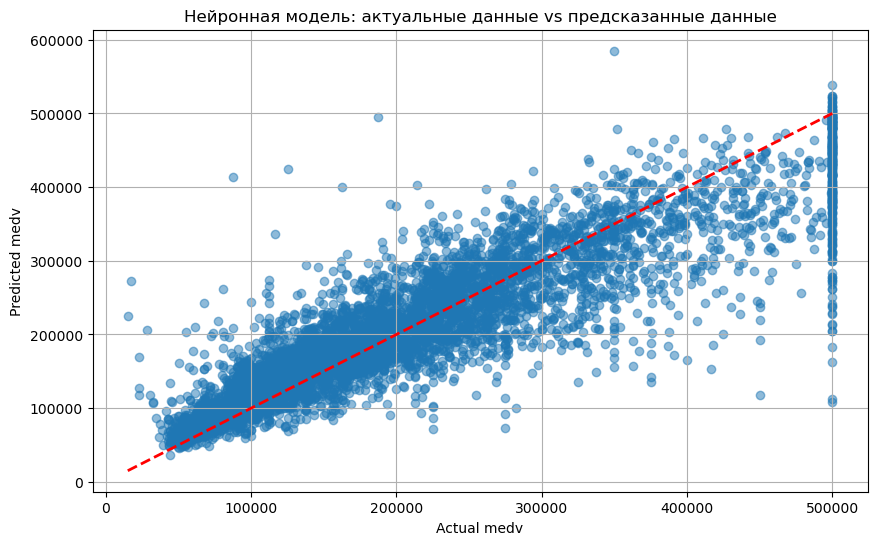

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Нейронная модель: актуальные данные vs предсказанные данные')
plt.grid(True)
plt.show()

Точки гораздо ближе к диагонали, особенно для среднего диапазона цен, хотя всё еще есть проблемы с предсказанием крайних значений

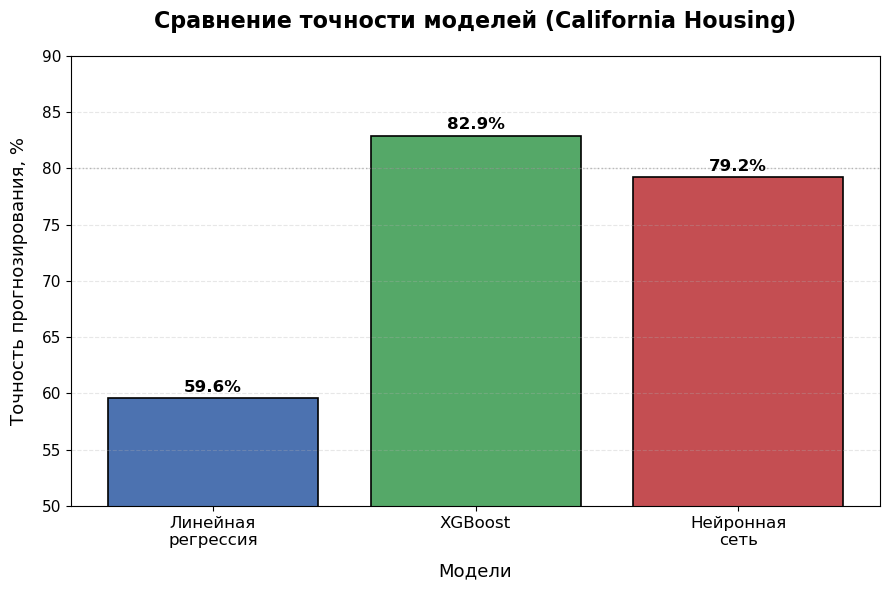

In [103]:
# Рассчитываем точность в процентах (R² * 100)
lr_r2 = metrics.r2_score(y_test, predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

plt.figure(figsize=(9, 6))

models = ['Линейная\nрегрессия', 'XGBoost', 'Нейронная\nсеть']
accuracy = [lr_r2 * 100, xgb_r2 * 100, nn_r2 * 100]

colors = ['#4C72B0', '#55A868', '#C44E52']

bars = plt.bar(models, accuracy, color=colors, edgecolor='black', linewidth=1.2)

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Сравнение точности моделей (California Housing)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Точность прогнозирования, %', fontsize=13, labelpad=10)
plt.xlabel('Модели', fontsize=13, labelpad=10)
plt.ylim(50, 90)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axhline(y=80, color='gray', linestyle=':', alpha=0.5, linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [104]:
print("\nРезультаты моделей:")
print(f"Линейная регрессия: R² = {lr_r2:.4f} ({lr_r2*100:.1f}%)")
print(f"XGBoost: R² = {xgb_r2:.4f} ({xgb_r2*100:.1f}%)")
print(f"Нейронная сеть: R² = {nn_r2:.4f} ({nn_r2*100:.1f}%)")


Результаты моделей:
Линейная регрессия: R² = 0.5958 (59.6%)
XGBoost: R² = 0.8292 (82.9%)
Нейронная сеть: R² = 0.7923 (79.2%)


### Общий вывод

#### Для точных прогнозов лучше использовать XGBoost, для быстрого анализа линейную регрессию, для исследований нейронные сети